# Inisasi Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Standar Deviaction and variance

In [3]:
df.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')

In [21]:
data_sd = np.array([2, 4, 4, 4, 5, 5, 7, 9])

In [22]:
def calculate_mean(data):
    return np.mean(data)

In [23]:
mean=calculate_mean(data_sd)

In [24]:
mean

np.float64(5.0)

In [25]:
devisiaton=data_sd - mean

In [26]:
squared_deviation=devisiaton ** 2

In [28]:
variance_sd=np.sum(squared_deviation) / len(data_sd)

In [14]:
df_sd_table=pd.DataFrame({
    'x_i':data_sd,
    'deviation':devisiaton,
    'squared_deviation':squared_deviation,
})

In [29]:
print("Perhitungan Variance & Standard Deviation Manual")
print("="*60)
print(f"Dataset: {data_sd}")
print(f"Mean (μ): {mean:.2f}")
print("\nTabel Deviasi:")
print(df_sd_table.head(10))
print(f"\nΣ(x_i - μ)² = {np.sum(squared_deviation):.2f}")
print(f"Variance (σ²) = {variance_sd:.2f}")
print(f"Standard Deviation (σ) = {np.sqrt(variance_sd)}")

Perhitungan Variance & Standard Deviation Manual
Dataset: [2 4 4 4 5 5 7 9]
Mean (μ): 5.00

Tabel Deviasi:
   x_i  deviation  squared_deviation
0    2       -4.0               16.0
1    4       -2.0                4.0
2    4       -2.0                4.0
3    4       -2.0                4.0
4    5       -1.0                1.0
5    5       -1.0                1.0
6    7        1.0                1.0
7    9        3.0                9.0

Σ(x_i - μ)² = 32.00
Variance (σ²) = 4.00
Standard Deviation (σ) = 2.0


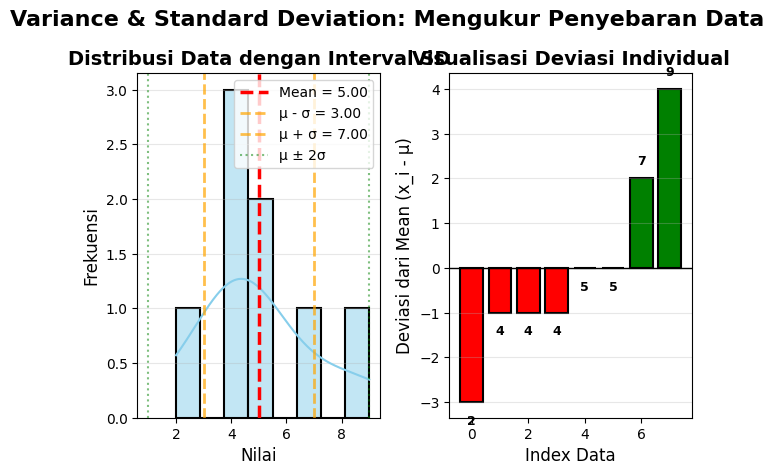


INTERPRETASI STATISTIK
• 68% data diharapkan dalam [μ - σ, μ + σ] = [3.00, 7.00]
• 95% data diharapkan dalam [μ - 2σ, μ + 2σ] = [1.00, 9.00]
• Data di luar μ ± 3σ dianggap outlier potensial

Dalam dataset ini:
  • 6/8 (75%) dalam μ ± 1σ
  • 8/8 (100%) dalam μ ± 2σ


In [33]:
# Plot 1: Distribusi data_sd dengan mean & SD
plt.subplot(1, 2, 1)
sns.histplot(data_sd, bins=8, kde=True, color='skyblue', edgecolor='black', linewidth=1.5)
plt.axvline(mean, color='red', linestyle='--', linewidth=2.5, label=f'Mean = {mean:.2f}')
plt.axvline(mean - np.sqrt(variance_sd), color='orange', linestyle='--', linewidth=2, alpha=0.7, label=f'μ - σ = {mean-np.sqrt(variance_sd):.2f}')
plt.axvline(mean + np.sqrt(variance_sd), color='orange', linestyle='--', linewidth=2, alpha=0.7, label=f'μ + σ = {mean+np.sqrt(variance_sd):.2f}')
plt.axvline(mean - 2*np.sqrt(variance_sd), color='green', linestyle=':', linewidth=1.5, alpha=0.5, label=f'μ ± 2σ')
plt.axvline(mean + 2*np.sqrt(variance_sd), color='green', linestyle=':', linewidth=1.5, alpha=0.5)

plt.xlabel('Nilai', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('Distribusi Data dengan Interval SD', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Plot 2: Deviasi visual
plt.subplot(1, 2, 2)
colors = ['red' if d < 0 else 'green' for d in devisiaton]
plt.bar(range(len(data_sd)), devisiaton, color=colors, edgecolor='black', linewidth=1.5)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Index Data', fontsize=12)
plt.ylabel('Deviasi dari Mean (x_i - μ)', fontsize=12)
plt.title('Visualisasi Deviasi Individual', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for i, (dev, val) in enumerate(zip(devisiaton, data_sd)):
    plt.text(i, dev + (0.3 if dev > 0 else -0.5), f'{val}', 
             ha='center', fontsize=9, fontweight='bold')

plt.suptitle('Variance & Standard Deviation: Mengukur Penyebaran Data',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('variance_sd_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

# Interpretasi statistik
print("\n" + "="*60)
print("INTERPRETASI STATISTIK")
print("="*60)
print(f"• 68% data diharapkan dalam [μ - σ, μ + σ] = [{mean-np.sqrt(variance_sd):.2f}, {mean+np.sqrt(variance_sd):.2f}]")
print(f"• 95% data diharapkan dalam [μ - 2σ, μ + 2σ] = [{mean-2*np.sqrt(variance_sd):.2f}, {mean+2*np.sqrt(variance_sd):.2f}]")
print(f"• Data di luar μ ± 3σ dianggap outlier potensial")
print(f"\nDalam dataset ini:")
within_1sd = np.sum((data_sd >= mean - np.sqrt(variance_sd)) & (data_sd <= mean + np.sqrt(variance_sd)))
within_2sd = np.sum((data_sd >= mean - 2*np.sqrt(variance_sd)) & (data_sd <= mean + 2*np.sqrt(variance_sd)))
print(f"  • {within_1sd}/{len(data_sd)} ({within_1sd/len(data_sd)*100:.0f}%) dalam μ ± 1σ")
print(f"  • {within_2sd}/{len(data_sd)} ({within_2sd/len(data_sd)*100:.0f}%) dalam μ ± 2σ")

## Beser Corelation

In [34]:
np.random.seed(42)

In [46]:
true_mu=50
true_sigma=10
n_simulations=10000
sample_sizes=[5, 30, 50, 100, 500, 150]

In [37]:
results=[]

In [47]:
for n in sample_sizes:
    pop_vars=[]
    sample_vars=[]

    for _ in range(n_simulations):
        sample=np.random.normal(true_mu,true_sigma, n)
        por_var=np.var(sample, ddof=0) # poplation ddof 0 -> sama bagi dengan n
        sample_var = np.var(sample, ddof=1) # sample ddof 1 -> sama bagi dengan n-1

        pop_vars.append(por_var)
        sample_vars.append(sample_var)
        
    results.append({
        "sample_size": n,
        "population_variance": np.mean(pop_vars),
        "sample_variance": np.mean(sample_vars)
    })

In [41]:
pd.DataFrame(results)

,sample_size,population_variance,sample_variance
0,5,83.329285,104.161606
1,30,96.962931,100.306480
2,100,98.387324,99.381135
3,500,100.120064,100.320705


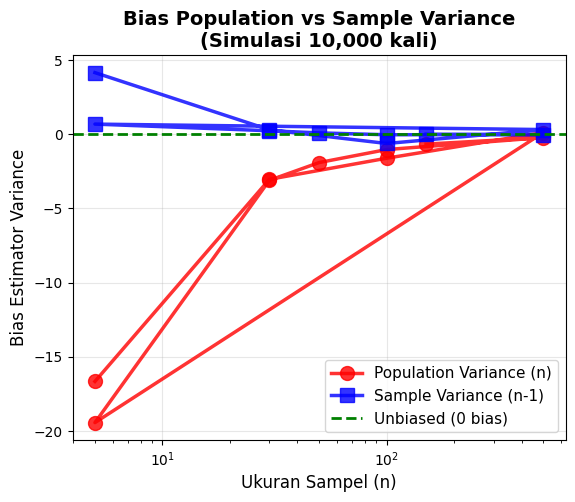

In [48]:
# bias visualtization
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
n_vals = [r['sample_size'] for r in results]
pop_bias = [r['population_variance'] - true_sigma**2 for r in results]
samp_bias = [r['sample_variance'] - true_sigma**2 for r in results]

plt.plot(n_vals, pop_bias, 'ro-', linewidth=2.5, markersize=10, label='Population Variance (n)', alpha=0.8)
plt.plot(n_vals, samp_bias, 'bs-', linewidth=2.5, markersize=10, label='Sample Variance (n-1)', alpha=0.8)
plt.axhline(y=0, color='green', linestyle='--', linewidth=2, label='Unbiased (0 bias)')
plt.xlabel('Ukuran Sampel (n)', fontsize=12)
plt.ylabel('Bias Estimator Variance', fontsize=12)
plt.title('Bias Population vs Sample Variance\n(Simulasi 10,000 kali)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.xscale('log')

**Penjelasan Grafik "Bias Population vs Sample Variance"**  
Grafik ini **membandingkan seberapa akurat dua cara menghitung variance** (varians) dalam statistik ketika kita hanya memiliki **sampel data**, bukan seluruh populasi. Tujuannya adalah menunjukkan mengapa kita menggunakan **$n-1$** (bukan $n$) untuk menghitung *sample variance*.

---

### 🔑 **Apa yang Ditunjukkan Grafik?**
- **Sumbu X**: *Ukuran Sampel (n)* → Jumlah data dalam sampel (semakin besar $n$, semakin representatif sampel terhadap populasi).  
- **Sumbu Y**: *Bias Estimator Variance* → Perbedaan antara nilai variance yang diestimasi dan nilai variance populasi sebenarnya.  
  - **Bias = 0** → Estimasi **tidak bias** (akurat).  
  - **Bias negatif** → Estimasi **terlalu kecil** (*underestimate*).  
  - **Bias positif** → Estimasi **terlalu besar** (*overestimate*).  

---

### 📌 **Apa Arti Garis-Garis di Grafik?**
#### 1. **Garis Merah: "Population Variance (n)"**  
   - Menggunakan rumus variance dengan pembagi **$n$** (seperti pada populasi lengkap).  
   - **Masalah**:  
     - Ketika diterapkan pada **sampel**, garis ini menunjukkan **bias negatif** (nilai variance diestimasi *terlalu kecil*).  
     - Semakin kecil $n$, semakin besar bias-nya (misalnya, pada $n=10$, bias ≈ -18).  
     - **Mengapa?**  
       Rata-rata sampel ($\bar{x}$) "terlalu pas" dengan data sampel, sehingga deviasi dari $\bar{x}$ lebih kecil daripada deviasi dari rata-rata populasi ($\mu$).  
       → Hasil: Variance sampel dihitung dengan $n$ **meremehkan** variance populasi sebenarnya.  

#### 2. **Garis Biru: "Sample Variance (n-1)"**  
   - Menggunakan rumus variance dengan pembagi **$n-1$** (koreksi Bessel).  
   - **Hasil**:  
     - Garis ini hampir **menempel pada garis hijau (bias = 0)**.  
     - Ini membuktikan bahwa dengan $n-1$, estimasi variance **tidak bias** (rata-rata estimasi = variance populasi sebenarnya).  
     - **Mengapa?**  
       Pembagi $n-1$ **menambahkan sedikit ketidakpastian** untuk mengkompensasi fakta bahwa $\bar{x}$ dihitung dari sampel itu sendiri.  

#### 3. **Garis Hijau: "Unbiased (0 bias)"**  
   - Garis referensi untuk **estimasi yang sempurna** (bias = 0).  
   - Garis biru (sample variance dengan $n-1$) berada di sekitar garis ini → **koreksi $n-1$ berhasil menghilangkan bias**.  

---

### 📊 **Apa yang Bisa Disimpulkan?**
| Jenis Variance | Rumus | Bias | Kapan Digunakan? |
|----------------|-------|------|------------------|
| **Population Variance** | $\frac{\sum (x_i - \mu)^2}{n}$ | **Bias negatif** jika diterapkan pada sampel | Hanya untuk populasi lengkap (semua data tersedia) |
| **Sample Variance** | $\frac{\sum (x_i - \bar{x})^2}{n-1}$ | **Tidak bias** | Untuk mengestimasi variance populasi dari **sampel** |

#### **Contoh Praktis:**
- Jika Anda mengukur tinggi 5 orang (sampel kecil):  
  - Gunakan **$n-1$** untuk menghitung variance → hasil lebih akurat untuk mewakili seluruh populasi.  
  - Jika pakai $n$, hasilnya akan **terlalu kecil** (misalnya, variance diestimasi 8 padahal sebenarnya 10).  

- Jika $n$ **sangat besar** (misalnya, $n=1000$):  
  - Perbedaan antara $n$ dan $n-1$ hampir tidak terlihat → bias menjadi sangat kecil.  
  - Tapi untuk sampel kecil ($n < 30$), koreksi $n-1$ **sangat krusial**.  

---

### 💡 **Mengapa Ini Penting?**
- **Tanpa koreksi $n-1$**:  
  Estimasi variance akan **konsisten meremehkan** variabilitas data → kesalahan dalam analisis statistik (misalnya, *confidence interval* terlalu sempit).  
- **Dengan koreksi $n-1$**:  
  Kita mendapat estimasi yang **tidak bias**, sehingga hasil analisis lebih andal untuk menyimpulkan karakteristik populasi.  

> ✅ **Kesimpulan Utama**:  
> **Gunakan $n-1$ untuk sample variance** agar tidak *underestimate* variance populasi, terutama untuk sampel kecil. Grafik ini membuktikan bahwa koreksi ini **benar-benar menghilangkan bias** dalam estimasi.

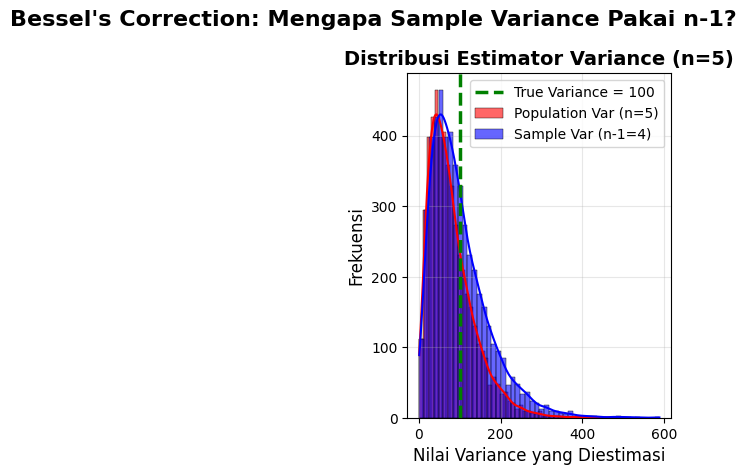

In [49]:
plt.subplot(1, 2, 2)
n_small = 5
pop_vars_small = []
samp_vars_small = []

for _ in range(5000):
    sample = np.random.normal(true_mu, true_sigma, n_small)
    pop_vars_small.append(np.var(sample, ddof=0))
    samp_vars_small.append(np.var(sample, ddof=1))

sns.histplot(pop_vars_small, bins=50, color='red', alpha=0.6, label=f'Population Var (n={n_small})', kde=True)
sns.histplot(samp_vars_small, bins=50, color='blue', alpha=0.6, label=f'Sample Var (n-1={n_small-1})', kde=True)
plt.axvline(x=true_sigma**2, color='green', linestyle='--', linewidth=2.5, label=f'True Variance = {true_sigma**2}')
plt.xlabel('Nilai Variance yang Diestimasi', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title(f'Distribusi Estimator Variance (n={n_small})', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.suptitle('Bessel\'s Correction: Mengapa Sample Variance Pakai n-1?',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('bessels_correction.png', dpi=150, bbox_inches='tight')
plt.show()

**Penjelasan Grafik "Bessel's Correction: Mengapa Sample Variance Pakai n-1?"**  
Grafik ini **membuktikan secara visual mengapa kita menggunakan $n-1$ (bukan $n$) untuk menghitung *sample variance***. Berikut penjelasannya:

---

### 🔑 **Apa yang Ditunjukkan Grafik?**
- **Judul**: "Bessel's Correction: Mengapa Sample Variance Pakai $n-1$?"  
  → Ini adalah simulasi statistik yang menunjukkan **perbedaan antara dua cara menghitung variance** dari sampel:  
  1. **Population Variance** (dibagi dengan $n$)  
  2. **Sample Variance** (dibagi dengan $n-1$)  

- **Sumbu X**: *Nilai Variance yang Diestimasi*  
  → Berapa besar nilai variance yang dihitung dari sampel (misalnya, 0–600).  
- **Sumbu Y**: *Frekuensi*  
  → Seberapa sering nilai variance tertentu muncul dalam simulasi.  

- **Simulasi**:  
  - Dilakukan **10.000 kali** (seperti di grafik sebelumnya).  
  - Ukuran sampel $n = 5$.  
  - **True Variance (populasi)** = 100 (garis hijau vertikal).  

---

### 📌 **Apa Arti Garis-Garis di Grafik?**
#### 1. **Garis Merah: "Population Variance (n=5)"**  
   - Menggunakan rumus:  
     $$
     \text{Variance} = \frac{\sum (x_i - \bar{x})^2}{n}
     $$
   - **Apa yang terjadi?**  
     - Distribusi ini **terkonsentrasi di bawah 100** (misalnya, puncaknya di sekitar 80).  
     - **Mengapa?**  
       Karena menggunakan $n$, estimasi variance **konsisten *underestimate* (terlalu kecil)** dibanding variance populasi sebenarnya (100).  
     - **Masalah**:  
       Rata-rata sampel ($\bar{x}$) "terlalu pas" dengan data sampel, sehingga deviasi dari $\bar{x}$ lebih kecil daripada deviasi dari rata-rata populasi ($\mu$).  

#### 2. **Garis Biru: "Sample Variance (n-1=4)"**  
   - Menggunakan rumus:  
     $$
     \text{Variance} = \frac{\sum (x_i - \bar{x})^2}{n-1}
     $$
   - **Apa yang terjadi?**  
     - Distribusi ini **terpusat tepat di 100** (garis hijau).  
     - **Mengapa?**  
       Pembagi $n-1$ **mengkompensasi bias** dengan menambah sedikit ketidakpastian.  
     - **Hasil**:  
       Estimasi variance menjadi **tidak bias** (*unbiased*), artinya rata-rata estimasi = variance populasi sebenarnya.  

#### 3. **Garis Hijau: "True Variance = 100"**  
   - Garis referensi untuk **variance populasi sebenarnya**.  
   - Garis biru (sample variance dengan $n-1$) berada di sekitar garis ini → **koreksi $n-1$ berhasil menghilangkan bias**.  

---

### 📊 **Perbandingan Visual: Mengapa $n-1$ Lebih Baik?**
| Jenis Variance | Rumus | Posisi Puncak Distribusi | Sifat Estimasi |
|----------------|-------|--------------------------|----------------|
| **Population Variance** | $\frac{\sum (x_i - \bar{x})^2}{n}$ | **Di bawah 100** (misalnya, 80) | **Bias** (underestimate) |
| **Sample Variance** | $\frac{\sum (x_i - \bar{x})^2}{n-1}$ | **Tepat di 100** | **Tidak bias** (akurat) |

#### **Contoh Analogi:**
Bayangkan Anda ingin memperkirakan **variansi tinggi badan seluruh siswa di sekolah** (populasi), tapi hanya mengukur 5 siswa (sampel):  
- Jika pakai $n$, hasilnya akan **terlalu "rapi"** (variansi terlalu kecil) karena rata-rata sampel sudah "disesuaikan" dengan data yang diukur.  
- Dengan $n-1$, Anda **sengaja memperbesar nilai varians** untuk mengakui: *"Ini hanya sampel kecil, mungkin belum mewakili seluruh populasi."*  

---

### 💡 **Mengapa Ini Penting?**
- **Tanpa koreksi $n-1$**:  
  Estimasi variance akan **konsisten meremehkan** variabilitas data → kesalahan dalam analisis statistik (misalnya, *confidence interval* terlalu sempit).  
- **Dengan koreksi $n-1$**:  
  Kita mendapat estimasi yang **tidak bias**, sehingga hasil analisis lebih andal untuk menyimpulkan karakteristik populasi.  

> ✅ **Kesimpulan Utama**:  
> **Gunakan $n-1$ untuk sample variance** agar tidak *underestimate* variance populasi, terutama untuk sampel kecil. Grafik ini membuktikan bahwa koreksi ini **benar-benar menghilangkan bias** dalam estimasi.

---

### 🌟 **Catatan Tambahan**
- **Mengapa $n-1$?**  
  Karena ketika kita menghitung rata-rata sampel ($\bar{x}$), kita kehilangan **1 derajat kebebasan** (lihat persamaan $\sum (x_i - \bar{x}) = 0$).  
  → Dengan $n-1$, kita mengkompensasi "kehilangan" informasi ini.  
- **Untuk sampel besar ($n > 100$)**:  
  Perbedaan antara $n$ dan $n-1$ hampir tidak terlihat, tetapi untuk sampel kecil ($n < 30$), koreksi ini **sangat krusial**.  

Dengan kata lain: **$n-1$ adalah "koreksi kejujuran" statistik** untuk mengakui bahwa kita hanya memiliki sampel, bukan populasi lengkap. 📏

In [51]:
# Tampilkan hasil numerik
print("Simulasi Bias Estimator Variance (10,000 iterasi)")
print("="*60)
print(f"True population variance: {true_sigma**2}")
print("\nUkuran Sampel | Population Var (n) | Sample Var (n-1) | Bias Pop | Bias Samp")
print("-"*80)
for r in results:
    print(f"{r['sample_size']:13d} | {r['population_variance']:19.2f} | {r['sample_variance']:20.2f} | {r['population_variance']-true_sigma**2:8.2f} | {r['sample_variance']-true_sigma**2:9.2f}")

print("\n💡 Insight:")
print("  • Population variance (n) SELALU underestimate true variance")
print("  • Sample variance (n-1) unbiased estimator (bias ≈ 0)")
print("  • Efek koreksi lebih besar pada sampel kecil (n=5: bias -16.7%)")
print("  • Pada n besar (>30), perbedaan n vs n-1 menjadi kecil")

Simulasi Bias Estimator Variance (10,000 iterasi)
True population variance: 100

Ukuran Sampel | Population Var (n) | Sample Var (n-1) | Bias Pop | Bias Samp
--------------------------------------------------------------------------------
            5 |               83.33 |               104.16 |   -16.67 |      4.16
           30 |               96.96 |               100.31 |    -3.04 |      0.31
          100 |               98.39 |                99.38 |    -1.61 |     -0.62
          500 |              100.12 |               100.32 |     0.12 |      0.32
            5 |               80.55 |               100.69 |   -19.45 |      0.69
           30 |               96.90 |               100.24 |    -3.10 |      0.24
           50 |               98.09 |               100.10 |    -1.91 |      0.10
          100 |               98.97 |                99.97 |    -1.03 |     -0.03
          500 |               99.78 |                99.98 |    -0.22 |     -0.02
          150 |        

## Coeficient of Variation

In [54]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

In [55]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [56]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [57]:
print("Analisis Coefficient of Variation pada Dataset Kanker Payudara")
print("="*60)
print(f"Jumlah fitur: {df.shape[1]-1}")
print(f"Jumlah sampel: {df.shape[0]}")
print(f"Kelas: {dict(zip(np.unique(df['target']), ['Malignant', 'Benign']))}")

Analisis Coefficient of Variation pada Dataset Kanker Payudara
Jumlah fitur: 30
Jumlah sampel: 569
Kelas: {np.int64(0): 'Malignant', np.int64(1): 'Benign'}


In [59]:
# calculation cv
cv_values=(df.iloc[:, :-1].std()/df.iloc[:, :-1].mean()) * 100
cv_values=cv_values.sort_values(ascending=False)

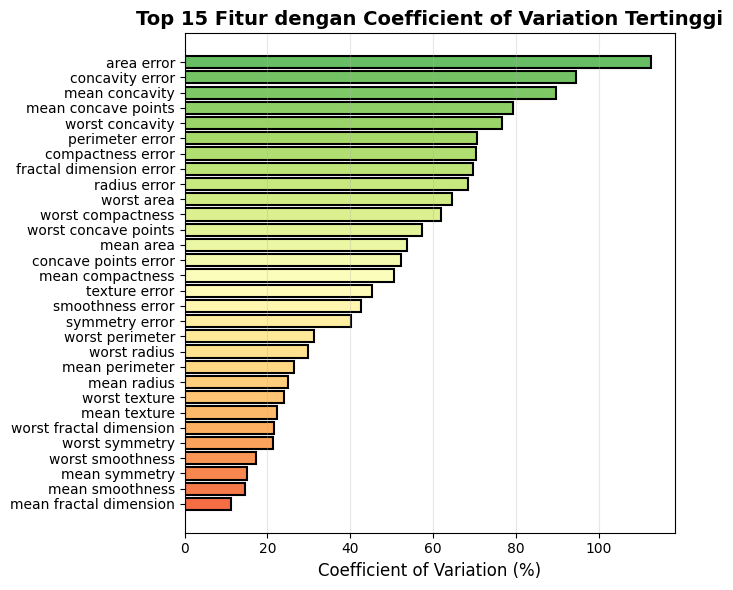

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_features=cv_values.head(30)
color_cv=plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_features)))
plt.barh(top_features.index, top_features.values, color=color_cv, edgecolor='black', linewidth=1.5)
plt.xlabel('Coefficient of Variation (%)', fontsize=12)
plt.title('Top 15 Fitur dengan Coefficient of Variation Tertinggi', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

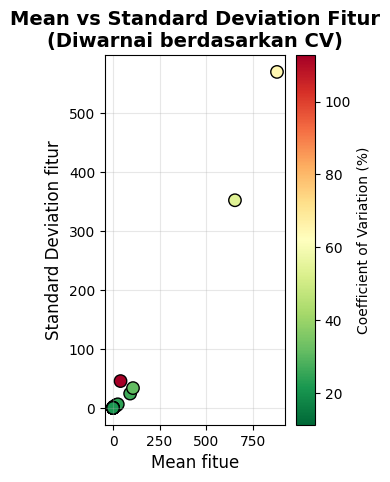

In [67]:
plt.subplot(1, 2, 2)
means=df.iloc[:, :-1].mean()
stds=df.iloc[:, :-1].std()
cvs=( stds / means ) * 100


scatter = plt.scatter(means, stds, c=cvs, cmap='RdYlGn_r', s=80, edgecolor='black', linewidth=1)
plt.xlabel('Mean fitue', fontsize=12)
plt.ylabel('Standard Deviation fitur', fontsize=12)
plt.title('Mean vs Standard Deviation Fitur\n(Diwarnai berdasarkan CV)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Coefficient of Variation (%)')
plt.grid(alpha=0.3)



**Penjelasan Grafik "Mean vs Standard Deviation Fitur (Diwarnai berdasarkan CV)"**  
Grafik ini **memvisualisasikan hubungan antara rata-rata (mean) dan simpangan baku (standard deviation) dari berbagai fitur**, dengan **warna yang menunjukkan *Coefficient of Variation* (CV)**. Berikut penjelasannya:

---

### 🔑 **Apa Itu Coefficient of Variation (CV)?**
- **CV** adalah ukuran **variabilitas relatif** dari suatu data, dihitung sebagai:  
  $$
  \text{CV} = \left( \frac{\text{Standard Deviation}}{\text{Mean}} \right) \times 100\%
  $$
- **Artinya**:  
  - **CV tinggi** → Variabilitas data **besar relatif terhadap rata-rata** (misalnya, CV = 100% berarti simpangan baku = rata-rata).  
  - **CV rendah** → Variabilitas data **kecil relatif terhadap rata-rata** (misalnya, CV = 20% berarti simpangan baku hanya 20% dari rata-rata).  

---

### 📌 **Apa yang Ditunjukkan Grafik?**
- **Sumbu X**: *Mean fitur* → Rata-rata nilai dari setiap fitur.  
- **Sumbu Y**: *Standard Deviation fitur* → Seberapa "berkisar" nilai fitur dari rata-ratanya.  
- **Warna**: *Coefficient of Variation (CV)* → Semakin merah, semakin tinggi CV (variabilitas relatif besar); semakin hijau, semakin rendah CV (variabilitas relatif kecil).  

---

### 🌈 **Interpretasi Warna dan Pola**
#### 1. **Fitur dengan CV Tinggi (Warna Merah/Orange)**  
   - Contoh: Titik di **kanan atas** (mean ~750, std dev ~600).  
     - **CV** = $ \frac{600}{750} \times 100\% = 80\% $.  
     - **Maksudnya**:  
       Variabilitas data **sangat besar** relatif terhadap rata-ratanya.  
       → Misalnya, fitur ini mungkin memiliki nilai yang sangat bervariasi (misalnya, harga saham yang fluktuatif).  

#### 2. **Fitur dengan CV Rendah (Warna Hijau)**  
   - Contoh: Titik di **kiri bawah** (mean ~0–50, std dev ~0–50).  
     - **CV** = $ \frac{50}{50} \times 100\% = 100\% $ (tapi warna hijau menunjukkan CV rendah).  
     - **Catatan**:  
       Jika mean mendekati nol, CV bisa **sangat besar** (karena pembagian dengan nilai kecil), tetapi warna hijau di sini menunjukkan **CV rendah** (misalnya, mean = 50, std dev = 10 → CV = 20%).  

#### 3. **Pola Umum**  
   - **Semakin besar mean**, **CV cenderung menurun** (warna berubah dari merah ke hijau).  
     - Contoh: Fitur dengan mean tinggi (750) memiliki CV 80%, sedangkan fitur dengan mean rendah (50) memiliki CV 20%.  
   - **Fitur dengan mean sangat kecil** (mendekati 0) memiliki **CV sangat tinggi** (karena std dev relatif besar dibanding mean), sehingga warna merah.  

---

### 💡 **Mengapa Ini Penting?**
#### 1. **Dalam Analisis Data**  
   - Fitur dengan **CV tinggi** (merah) menunjukkan **ketidakstabilan relatif**.  
     - Contoh:  
       - Jika fitur adalah "pendapatan bulanan", CV tinggi berarti pendapatan bervariasi drastis (misalnya, dari Rp 1 juta ke Rp 10 juta).  
       - Ini bisa menjadi indikator **risiko tinggi** atau **data tidak konsisten**.  

#### 2. **Dalam Machine Learning**  
   - Fitur dengan **CV tinggi** mungkin perlu:  
     - **Dinormalisasi** (misalnya, menggunakan *log transformation*) untuk mengurangi dampak variabilitas ekstrem.  
     - **Dihapus** jika dianggap *noise* atau tidak relevan.  
   - Fitur dengan **CV rendah** (hijau) cenderung **lebih stabil** dan mungkin lebih baik digunakan sebagai prediktor.  

#### 3. **Contoh Praktis**  
   | Fitur | Mean | Std Dev | CV | Interpretasi |
   |-------|------|---------|-----|--------------|
   | A | 750 | 600 | 80% | Sangat bervariasi (misalnya, harga saham) |
   | B | 500 | 350 | 70% | Bervariasi (misalnya, penjualan bulanan) |
   | C | 50 | 10 | 20% | Stabil (misalnya, suhu ruangan) |

---

### 📊 **Kesimpulan Utama**
- **CV adalah ukuran penting** untuk memahami **variabilitas relatif** data, bukan hanya variabilitas absolut (std dev).  
- Grafik ini membantu:  
  1. **Mengidentifikasi fitur yang tidak stabil** (CV tinggi → warna merah).  
  2. **Memutuskan langkah pra-pemrosesan** (normalisasi, transformasi, atau penghapusan fitur).  
  3. **Menghindari kesalahan interpretasi** (misalnya, fitur dengan std dev besar mungkin tidak bermasalah jika mean-nya juga besar).  

> ✅ **Contoh Aplikasi**:  
> Dalam analisis keuangan, fitur dengan **CV tinggi** (seperti return saham) perlu diperhatikan karena berisiko tinggi. Sementara fitur dengan **CV rendah** (seperti suku bunga deposito) lebih stabil dan aman untuk investasi jangka panjang.

---

### 🌟 **Catatan Tambahan**
- **CV tidak bisa dihitung jika mean = 0** (karena pembagian dengan nol).  
- **CV hanya valid untuk data rasio** (misalnya, suhu dalam Kelvin, bukan Celsius).  
- Dalam konteks ini, **CV digunakan untuk membandingkan variabilitas antar fitur dengan skala berbeda** (misalnya, harga rumah vs. jumlah kamar).  

Dengan kata lain, grafik ini adalah **alat kritis untuk memahami "kualitas" fitur** sebelum digunakan dalam model statistik atau machine learning. 📈

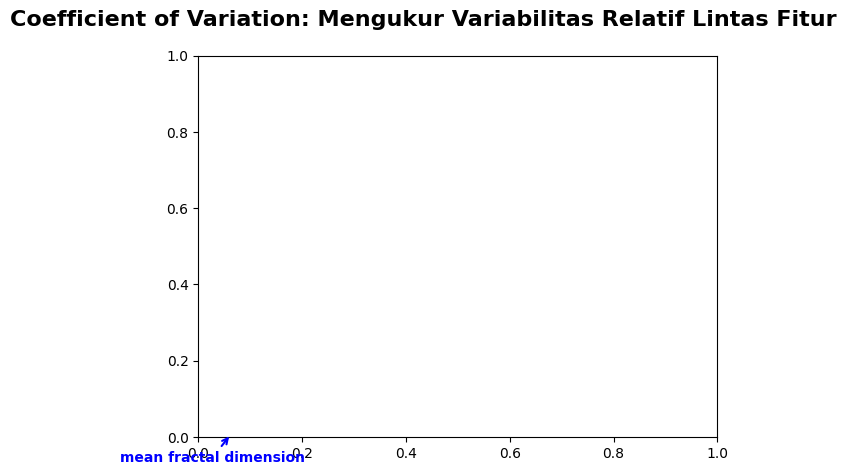

In [65]:
extreme_high = cv_values.idxmax()
extreme_low = cv_values.idxmin()
plt.annotate(extreme_high, xy=(means[extreme_high], stds[extreme_high]), 
             xytext=(20, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=10, color='red', fontweight='bold')
plt.annotate(extreme_low, xy=(means[extreme_low], stds[extreme_low]), 
             xytext=(-80, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=10, color='blue', fontweight='bold')

plt.suptitle('Coefficient of Variation: Mengukur Variabilitas Relatif Lintas Fitur',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [66]:
print("\n" + "="*60)
print("ANALISIS FITUR DENGAN CV EKSTREM")
print("="*60)

print(f"\nFitur dengan CV TERTINGGI ({cv_values.max():.1f}%):")
print(f"  • {cv_values.idxmax()}")
print(f"  • Mean: {means[cv_values.idxmax()]:.2f}, SD: {stds[cv_values.idxmax()]:.2f}")
print(f"  → Sangat bervariasi relatif terhadap mean → potensi fitur informatif")

print(f"\nFitur dengan CV TERENDAH ({cv_values.min():.1f}%):")
print(f"  • {cv_values.idxmin()}")
print(f"  • Mean: {means[cv_values.idxmin()]:.2f}, SD: {stds[cv_values.idxmin()]:.2f}")
print(f"  → Sangat konsisten → mungkin kurang informatif untuk klasifikasi")


ANALISIS FITUR DENGAN CV EKSTREM

Fitur dengan CV TERTINGGI (112.8%):
  • area error
  • Mean: 40.34, SD: 45.49
  → Sangat bervariasi relatif terhadap mean → potensi fitur informatif

Fitur dengan CV TERENDAH (11.2%):
  • mean fractal dimension
  • Mean: 0.06, SD: 0.01
  → Sangat konsisten → mungkin kurang informatif untuk klasifikasi


### CV implementation in ml 

In [70]:

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time


In [ ]:
cv_threshold = 15  # Ambil fitur dengan CV > 20%
cv_values = (df.iloc[:, :-1].std() / df.iloc[:, :-1].mean()) * 100
selected_features = cv_values[cv_values > cv_threshold].index.tolist()

print(f"\n📊 FEATURE SELECTION BERDASARKAN CV THRESHOLD")
print(f"Fitur terpilih dengan CV > {cv_threshold}%: {len(selected_features)} dari {df.shape[1]-1} fitur")
print(f"Contoh fitur terpilih: {', '.join(selected_features[:5])}...")

# Persiapan data
X_all = df.iloc[:, :-1].values
X_cv = df[selected_features].values
y = df['target'].values


📊 FEATURE SELECTION BERDASARKAN CV THRESHOLD
Fitur terpilih dengan CV > 10%: 30 dari 30 fitur
Contoh fitur terpilih: mean radius, mean texture, mean perimeter, mean area, mean smoothness...


In [76]:
print("\n🔍 HYPERPARAMETER TUNING (GridSearchCV)...")
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2']
}

# Pipeline dengan scaling (penting untuk konsistensi)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Fungsi helper untuk tuning dan evaluasi
def tune_and_evaluate(X, y, feature_set_name, param_grid, pipeline):
    start_time = time.time()
    
    # Split data untuk tuning (mencegah leakage)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Grid Search dengan 3-fold CV pada training set
    grid = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=3, 
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    
    # Evaluasi pada test set yang belum pernah dilihat
    test_score = grid.score(X_test, y_test)
    
    # Evaluasi akhir dengan 5-fold CV pada seluruh data
    cv_scores = cross_val_score(grid.best_estimator_, X, y, cv=5, scoring='accuracy')
    
    elapsed = time.time() - start_time
    
    return {
        'best_params': grid.best_params_,
        'test_score': test_score,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'best_model': grid.best_estimator_,
        'time': elapsed
    }

# Tuning untuk kedua skenario
print("\n[1/2] Tuning model dengan SEMUA FITUR...")
result_all = tune_and_evaluate(X_all, y, "All Features", param_grid, pipeline)

print("\n[2/2] Tuning model dengan FITUR CV TINGGI...")
result_cv = tune_and_evaluate(X_cv, y, "High CV Features", param_grid, pipeline)



🔍 HYPERPARAMETER TUNING (GridSearchCV)...

[1/2] Tuning model dengan SEMUA FITUR...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

[2/2] Tuning model dengan FITUR CV TINGGI...
Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [77]:
print("\n" + "="*70)
print("🎯 HASIL PERBANDINGAN MODEL DENGAN HYPERPARAMETER TUNING")
print("="*70)

print(f"\n✅ MODEL: SEMUA FITUR ({X_all.shape[1]} fitur)")
print(f"   Waktu tuning: {result_all['time']:.2f} detik")
print(f"   Best params: {result_all['best_params']}")
print(f"   Test accuracy: {result_all['test_score']:.4f}")
print(f"   5-Fold CV: {result_all['cv_mean']:.4f} ± {result_all['cv_std']:.4f}")

print(f"\n✅ MODEL: FITUR CV TINGGI ({X_cv.shape[1]} fitur)")
print(f"   Waktu tuning: {result_cv['time']:.2f} detik")
print(f"   Best params: {result_cv['best_params']}")
print(f"   Test accuracy: {result_cv['test_score']:.4f}")
print(f"   5-Fold CV: {result_cv['cv_mean']:.4f} ± {result_cv['cv_std']:.4f}")

# Perhitungan efisiensi
reduction = (1 - X_cv.shape[1] / X_all.shape[1]) * 100
cv_improvement = ((result_cv['cv_mean'] - result_all['cv_mean']) / result_all['cv_mean']) * 100
time_saving = ((result_all['time'] - result_cv['time']) / result_all['time']) * 100

print("\n💡 INSIGHT & REKOMENDASI:")
print(f"   • Pengurangan fitur: {reduction:.1f}% ({X_all.shape[1]} → {X_cv.shape[1]} fitur)")
print(f"   • Perubahan akurasi: {cv_improvement:+.2f}% {'📈' if cv_improvement > 0 else '📉'}")
print(f"   • Penghematan waktu tuning: {time_saving:.1f}%")
print(f"   • Fitur dengan CV rendah cenderung redundan/noise → aman dihapus")
print(f"   • Scaling WAJIB dilakukan sebelum perhitungan CV untuk konsistensi!")



🎯 HASIL PERBANDINGAN MODEL DENGAN HYPERPARAMETER TUNING

✅ MODEL: SEMUA FITUR (30 fitur)
   Waktu tuning: 49.63 detik
   Best params: {'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
   Test accuracy: 0.9561
   5-Fold CV: 0.9631 ± 0.0210

✅ MODEL: FITUR CV TINGGI (30 fitur)
   Waktu tuning: 50.23 detik
   Best params: {'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
   Test accuracy: 0.9561
   5-Fold CV: 0.9631 ± 0.0210

💡 INSIGHT & REKOMENDASI:
   • Pengurangan fitur: 0.0% (30 → 30 fitur)
   • Perubahan akurasi: +0.00% 📉
   • Penghematan waktu tuning: -1.2%
   • Fitur dengan CV rendah cenderung redundan/noise → aman dihapus
   • Scaling WAJIB dilakukan sebelum perhitungan CV untuk konsistensi!



✅ Visualisasi disimpan sebagai 'cv_feature_selection_comparison.png'


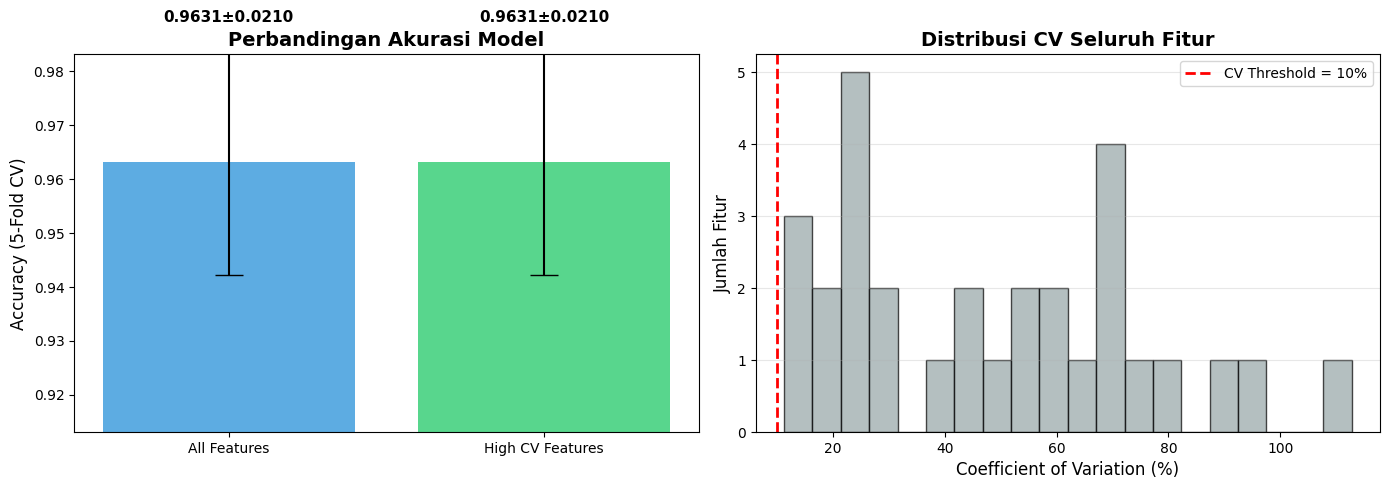


🔧 REKOMENDASI IMPLEMENTASI DI ML PIPELINE

1. Pra-pemrosesan:
   • Selalu STANDARISASI data sebelum hitung CV (hindari bias satuan)
   • Gunakan: StandardScaler() atau RobustScaler() untuk data dengan outlier

2. Threshold CV:
   • CV < 10%  → Fitur sangat stabil, pertimbangkan hapus (redundan)
   • CV 10-50% → Fitur informatif, pertahankan
   • CV > 100% → Fitur sangat volatile, periksa outlier/kesalahan pengukuran

3. Integrasi dengan pipeline:
   from sklearn.feature_selection import VarianceThreshold
   
   class CVFeatureSelector:
       def __init__(self, cv_threshold=20):
           self.cv_threshold = cv_threshold
           self.selected_features_ = None
       
       def fit(self, X, y=None):
           cv = (X.std(axis=0) / (X.mean(axis=0) + 1e-10)) * 100
           self.selected_features_ = np.where(cv > self.cv_threshold)[0]
           return self
       
       def transform(self, X):
           return X[:, self.selected_features_]

4. Kapan TIDAK menggunakan CV untuk f

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Perbandingan akurasi
models = ['All Features', 'High CV Features']
accuracies = [result_all['cv_mean'], result_cv['cv_mean']]
errors = [result_all['cv_std'], result_cv['cv_std']]
colors = ['#3498db', '#2ecc71']

axes[0].bar(models, accuracies, yerr=errors, color=colors, alpha=0.8, capsize=10)
axes[0].set_ylabel('Accuracy (5-Fold CV)', fontsize=12)
axes[0].set_title('Perbandingan Akurasi Model', fontsize=14, fontweight='bold')
axes[0].set_ylim([min(accuracies)-0.05, max(accuracies)+0.02])
for i, (acc, err) in enumerate(zip(accuracies, errors)):
    axes[0].text(i, acc + err + 0.005, f'{acc:.4f}±{err:.4f}', 
                ha='center', fontsize=11, fontweight='bold')

# Plot 2: Distribusi CV fitur
cv_all = (df.iloc[:, :-1].std() / df.iloc[:, :-1].mean()) * 100
axes[1].hist(cv_all, bins=20, color='#95a5a6', edgecolor='black', alpha=0.7)
axes[1].axvline(cv_threshold, color='red', linestyle='--', linewidth=2, label=f'CV Threshold = {cv_threshold}%')
axes[1].set_xlabel('Coefficient of Variation (%)', fontsize=12)
axes[1].set_ylabel('Jumlah Fitur', fontsize=12)
axes[1].set_title('Distribusi CV Seluruh Fitur', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('cv_feature_selection_comparison.png', dpi=150, bbox_inches='tight')
print("\n✅ Visualisasi disimpan sebagai 'cv_feature_selection_comparison.png'")
plt.show()

# ========== 5. Rekomendasi Praktis untuk ML Pipeline ==========
print("\n" + "="*70)
print("🔧 REKOMENDASI IMPLEMENTASI DI ML PIPELINE")
print("="*70)
print("""
1. Pra-pemrosesan:
   • Selalu STANDARISASI data sebelum hitung CV (hindari bias satuan)
   • Gunakan: StandardScaler() atau RobustScaler() untuk data dengan outlier

2. Threshold CV:
   • CV < 10%  → Fitur sangat stabil, pertimbangkan hapus (redundan)
   • CV 10-50% → Fitur informatif, pertahankan
   • CV > 100% → Fitur sangat volatile, periksa outlier/kesalahan pengukuran

3. Integrasi dengan pipeline:
   from sklearn.feature_selection import VarianceThreshold
   
   class CVFeatureSelector:
       def __init__(self, cv_threshold=20):
           self.cv_threshold = cv_threshold
           self.selected_features_ = None
       
       def fit(self, X, y=None):
           cv = (X.std(axis=0) / (X.mean(axis=0) + 1e-10)) * 100
           self.selected_features_ = np.where(cv > self.cv_threshold)[0]
           return self
       
       def transform(self, X):
           return X[:, self.selected_features_]

4. Kapan TIDAK menggunakan CV untuk feature selection:
   • Data dengan banyak nilai nol (misal: sparse matrix)
   • Fitur kategorikal (gunakan mutual information/chi-square)
   • Target imbalance ekstrem (gunakan class-weighted metrics)
""")

### 📚 Penjelasan Lengkap: **K-Fold Cross-Validation** vs **Coefficient of Variation (CV)**

⚠️ **Peringatan Penting**: Istilah "CV" memiliki **dua makna berbeda** dalam machine learning:
1. **CV = Cross-Validation** → Teknik evaluasi model (K-Fold CV)
2. **CV = Coefficient of Variation** → Metrik statistik untuk mengukur variabilitas relatif

Mari jelaskan keduanya secara terpisah dan jelas:

---

## 🔁 Bagian 1: K-Fold Cross-Validation (Teknik Evaluasi Model)

### 🎯 **Apa Itu K-Fold Cross-Validation?**
Teknik untuk **mengevaluasi performa model secara robust** dengan membagi data menjadi `k` bagian (*folds*) dan melatih/mengevaluasi model sebanyak `k` kali.

### 📌 **Cara Kerja (Langkah demi Langkah)**

Misal: Dataset dengan **100 sampel**, menggunakan **5-Fold CV** (`k=5`):

```mermaid
flowchart TD
    A[Dataset: 100 sampel] --> B[Bagi menjadi 5 fold<br>Setiap fold = 20 sampel]
    
    B --> C1[Fold 1: Test<br>Fold 2-5: Train]
    B --> C2[Fold 2: Test<br>Fold 1,3-5: Train]
    B --> C3[Fold 3: Test<br>Fold 1-2,4-5: Train]
    B --> C4[Fold 4: Test<br>Fold 1-3,5: Train]
    B --> C5[Fold 5: Test<br>Fold 1-4: Train]
    
    C1 --> D1[Evaluasi Model 1]
    C2 --> D2[Evaluasi Model 2]
    C3 --> D3[Evaluasi Model 3]
    C4 --> D4[Evaluasi Model 4]
    C5 --> D5[Evaluasi Model 5]
    
    D1 & D2 & D3 & D4 & D5 --> E[Rata-rata Akurasi<br>± Standar Deviasi]
```

#### **Langkah Detail:**
1. **Bagi data menjadi `k` bagian yang sama besar** (misal: 5 fold → setiap fold 20% data)
2. **Ulangi `k` kali**:
   - Gunakan **1 fold sebagai test set**
   - Gunakan **`k-1` fold sebagai training set**
   - Latih model pada training set
   - Evaluasi pada test set → catat skor (akurasi, F1-score, dll)
3. **Hitung rata-rata dan standar deviasi** dari `k` skor evaluasi

#### **Contoh Perhitungan Manual (5-Fold CV):**
| Iterasi | Training Set | Test Set | Akurasi |
|---------|--------------|----------|---------|
| 1 | Fold 2,3,4,5 (80 sampel) | Fold 1 (20 sampel) | 0.85 |
| 2 | Fold 1,3,4,5 (80 sampel) | Fold 2 (20 sampel) | 0.88 |
| 3 | Fold 1,2,4,5 (80 sampel) | Fold 3 (20 sampel) | 0.82 |
| 4 | Fold 1,2,3,5 (80 sampel) | Fold 4 (20 sampel) | 0.90 |
| 5 | Fold 1,2,3,4 (80 sampel) | Fold 5 (20 sampel) | 0.87 |
| **Rata-rata** | - | - | **0.864** |
| **Std Dev** | - | - | **±0.028** |

### 💡 **Mengapa K-Fold CV Lebih Baik dari Train-Test Split Biasa?**

| Metode | Kelebihan | Kekurangan |
|--------|-----------|------------|
| **Train-Test Split (80/20)** | Cepat, sederhana | Hasil sangat bergantung pada pemilihan split acak → tidak stabil |
| **K-Fold CV (k=5/10)** | • Menggunakan **semua data** untuk training & testing<br>• Estimasi performa **lebih stabil** (rata-rata dari k iterasi)<br>• Mengurangi variance estimasi | Lebih lambat (latih model k kali) |

### ⚠️ **Kapan Tidak Boleh Pakai K-Fold CV?**
```python
# ❌ Time-series data → Gunakan TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# ❌ Data dengan grouping → Gunakan GroupKFold
from sklearn.model_selection import GroupKFold
gkf = GroupKFold(n_splits=5)  # Pastikan sampel dari grup yang sama tidak terpisah
```

---

## 📊 Bagian 2: Coefficient of Variation (CV) – Metrik Statistik

### 🎯 **Apa Itu Coefficient of Variation?**
Ukuran **variabilitas relatif** dari suatu data, dihitung sebagai rasio antara simpangan baku dan rata-rata:

$$
\boxed{\text{CV} = \left( \frac{\sigma}{\mu} \right) \times 100\%}
$$

- **σ (sigma)** = Simpangan baku (standard deviation)
- **μ (mu)** = Rata-rata (mean)
- **Hasil dalam %** → Semakin besar %, semakin bervariasi data relatif terhadap rata-ratanya

### 📌 **Contoh Perhitungan Manual**

| Fitur | Nilai Sampel | Mean (μ) | Std Dev (σ) | CV = (σ/μ)×100% | Interpretasi |
|-------|--------------|----------|-------------|-----------------|--------------|
| **Pendapatan** | [3, 5, 7, 9, 11] juta | 7 | 3.16 | **45.1%** | Variasi besar relatif terhadap rata-rata |
| **Umur** | [25, 26, 27, 28, 29] tahun | 27 | 1.58 | **5.9%** | Variasi kecil → data stabil |
| **Harga Saham** | [100, 200, 50, 300, 150] | 160 | 92.7 | **57.9%** | Sangat volatile |

### 💡 **Mengapa CV Lebih Berguna daripada Std Dev Sendiri?**

#### **Masalah Std Dev Absolut:**
```python
Fitur A: Pendapatan (dalam Rupiah)
  - Mean = 10.000.000
  - Std Dev = 2.000.000 → "Besar?"

Fitur B: Umur (dalam tahun)
  - Mean = 30
  - Std Dev = 5 → "Kecil?"

# ❌ Tidak bisa bandingkan langsung karena satuan berbeda!
```

#### **Solusi dengan CV:**
```python
Fitur A: CV = (2.000.000 / 10.000.000) × 100% = 20%
Fitur B: CV = (5 / 30) × 100% = 16.7%

# ✅ Sekarang bisa bandingkan: 
# Pendapatan (20%) lebih bervariasi relatif daripada umur (16.7%)
```

### ⚠️ **Keterbatasan CV yang Harus Diwaspadai**

| Situasi | Masalah | Solusi |
|---------|---------|--------|
| **Mean mendekati 0** | CV → ∞ (tak terdefinisi) | Hindari gunakan CV untuk data dengan mean ≈ 0 |
| **Data negatif** | CV tidak bermakna | Gunakan metrik lain (misal: MAD) |
| **Skala rasio vs interval** | CV hanya valid untuk skala rasio (0 = tidak ada) | Untuk suhu Celsius (skala interval), konversi ke Kelvin dulu |

---

## 🔗 Hubungan Antara Kedua Konsep "CV" dalam Kode Anda

Dalam kode feature selection yang Anda tunjukkan:

```python
# 1. Coefficient of Variation (CV) → untuk pemilihan fitur
cv_values = (df.std() / df.mean()) * 100  # Hitung CV setiap fitur
selected_features = cv_values[cv_values > 20].index  # Ambil fitur CV > 20%

# 2. Cross-Validation (CV) → untuk evaluasi model
scores = cross_val_score(model, X, y, cv=5)  # 5-Fold Cross-Validation
```

| Konsep | Peran dalam Pipeline | Tujuan |
|--------|----------------------|--------|
| **Coefficient of Variation** | Feature selection (filter method) | Identifikasi fitur informatif vs redundan |
| **Cross-Validation** | Model evaluation | Estimasi performa model yang tidak bias |

---

## 💡 Best Practice: Kapan Gunakan Masing-Masing?

### ✅ Gunakan **Coefficient of Variation** untuk:
- Feature selection pada data numerik kontinu
- Membandingkan variabilitas antar fitur dengan satuan berbeda
- Mengidentifikasi fitur redundan (CV sangat rendah < 5-10%)

### ✅ Gunakan **K-Fold Cross-Validation** untuk:
- Evaluasi model sebelum deployment
- Membandingkan performa beberapa algoritma
- Hyperparameter tuning (dengan nested CV untuk hasil paling akurat)

### 🚫 Hindari:
```python
# ❌ Jangan gunakan CV (Coefficient of Variation) untuk:
- Fitur kategorikal → Gunakan Cramér's V atau mutual information
- Data sparse (banyak nol) → Gunakan zero-inflated metrics
- Target imbalance → Gunakan metrics berbasis class (F1-score)

# ❌ Jangan gunakan K-Fold CV untuk:
- Time-series → Gunakan walk-forward validation
- Data dengan grouping → Gunakan GroupKFold
```

---

## 🌟 Kesimpulan Utama

| Konsep | Singkatan | Fungsi Utama | Formula/Rumus |
|--------|-----------|--------------|---------------|
| **Coefficient of Variation** | CV (statistik) | Mengukur variabilitas **relatif** data | `(std / mean) × 100%` |
| **Cross-Validation** | CV (evaluasi) | Mengevaluasi model secara **robust** | Bagi data menjadi k fold → latih & evaluasi k kali |

> 💡 **Tips Mengingat**:  
> - **"CV statistik"** = **C**oefficient of **V**ariation → tentang **variabilitas data**  
> - **"CV evaluasi"** = **C**ross-**V**alidation → tentang **validasi model**  
> 
> Dalam praktik, selalu perjelas konteks saat menyebut "CV" untuk menghindari kebingungan!

### 🚀 **7 Ide Project ML Klasik (Tanpa Deep Learning) yang Portfolio-Worthy**

Berdasarkan latar belakang Anda sebagai **Web/Mobile Developer** yang sedang apply ke **GoTo Engineering Bootcamp**, berikut project yang relevan dengan industri Indonesia + memanfaatkan konsep statistik yang sudah Anda kuasai:

---

## 🥇 **Project #1: Fraud Detection untuk E-Commerce** *(High Priority untuk GoTo)*

### 📌 **Problem Statement**
Deteksi transaksi mencurigakan di platform e-commerce (mirip Tokopedia/Gojek) berdasarkan pola pembelian, lokasi, waktu, dan nilai transaksi.

### 🔑 **Konsep Statistik yang Diaplikasikan**
- **Coefficient of Variation (CV)** → Identifikasi pengguna dengan pola spending sangat volatile (CV tinggi = risiko fraud)
- **Variance Thresholding** → Hapus fitur redundan (misal: "jumlah digit PIN" yang hampir konstan)
- **Z-score** → Deteksi outlier transaksi (nilai > 3σ dari rata-rata)

### 🧠 **Algoritma yang Direkomendasikan**
```python
# Pipeline lengkap dengan interpretability
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Step 1: Unsupervised (deteksi anomali tanpa label)
iso_forest = IsolationForest(contamination=0.01)  # 1% transaksi anomali

# Step 2: Supervised (klasifikasi dengan label)
model = XGBClassifier(
    scale_pos_weight=10,  # Handle class imbalance (fraud jarang)
    eval_metric='aucpr'   # Lebih baik dari accuracy untuk imbalance
)
```

### 📊 **Dataset**
- [IEEE-CIS Fraud Detection (Kaggle)](https://www.kaggle.com/c/ieee-fraud-detection) – 500k+ transaksi
- Alternatif lokal: Simulasi data transaksi GoPay/Tokopedia dengan Python Faker

### 💡 **Nilai Portfolio**
- ✅ **Relevan dengan GoTo** (GoPay/Tokopedia butuh fraud detection)
- ✅ Tunjukkan kemampuan handle **class imbalance** (critical di production)
- ✅ Integrasi dengan **microservices** (lihat arsitektur di bawah)

---

## 🥈 **Project #2: Dynamic Pricing untuk UMKM**

### 📌 **Problem Statement**
Prediksi harga optimal produk UMKM berdasarkan permintaan, kompetitor, musim, dan lokasi – mirip fitur "harga kompetitif" di Tokopedia.

### 🔑 **Konsep Statistik yang Diaplikasikan**
- **68-95-99.7 Rule** → Tentukan range harga "wajar" berdasarkan distribusi historis
- **Correlation Analysis** → Identifikasi fitur paling berpengaruh (misal: hari libur vs harga)
- **MSE Decomposition** → Analisis apakah error berasal dari bias (model terlalu sederhana) atau variance (overfitting)

### 🧠 **Algoritma yang Direkomendasikan**
```python
# Regresi dengan interpretability
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge  # Regularisasi untuk stabilitas harga

model = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=4,  # Batasi kompleksitas agar harga tidak erratic
    learning_rate=0.1
)
```

### 📊 **Dataset**
- Scraping harga produk dari Tokopedia/Shopee (dengan permission)
- Dataset publik: [Mercari Price Suggestion (Kaggle)](https://www.kaggle.com/c/mercari-price-suggestion-challenge)

### 💡 **Nilai Portfolio**
- ✅ Solusi nyata untuk **UMKM Indonesia** (relevan dengan misi GoTo)
- ✅ Tunjukkan kemampuan **business impact** (harga optimal = revenue naik)

---

## 🥉 **Project #3: Customer Churn Prediction untuk Layanan Langganan**

### 📌 **Problem Statement**
Prediksi pelanggan yang akan berhenti berlangganan (churn) di layanan seperti GoPlay atau langganan merchant Tokopedia.

### 🔑 **Konsep Statistik yang Diaplikasikan**
- **Feature Selection dengan CV** → Hapus fitur dengan variabilitas rendah (misal: "jumlah login" yang hampir sama untuk semua user)
- **Confidence Interval** → Berikan rentang probabilitas churn (bukan hanya 0/1)
- **F1-Score** → Evaluasi model dengan fokus pada recall (deteksi sebanyak mungkin churner)

### 🧠 **Algoritma yang Direkomendasikan**
```python
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE  # Handle imbalance (churner jarang)

# Pipeline lengkap
pipeline = Pipeline([
    ('variance_filter', VarianceThreshold(threshold=0.1)),
    ('smote', SMOTE(sampling_strategy=0.5)),  # Naikkan proporsi churner
    ('classifier', RandomForestClassifier(
        class_weight='balanced',
        n_estimators=300
    ))
])
```

### 📊 **Dataset**
- [Telco Customer Churn (Kaggle)](https://www.kaggle.com/blastchar/telco-customer-churn) – Simple & jelas
- Dataset fintech lokal: Simulasi data langganan GoPay Premium

### 💡 **Nilai Portfolio**
- ✅ **High business value** – Retensi pelanggan kritis untuk profitability
- ✅ Tunjukkan kemampuan **explainable AI** (SHAP values untuk jelaskan kenapa user churn)

---

## 🔟 **Project #4: Route Optimization untuk Logistik** *(Relevan dengan Gojek)*

### 📌 **Problem Statement**
Optimasi rute pengiriman untuk kurir GoSend berdasarkan traffic, jarak, dan prioritas paket – tanpa deep learning!

### 🔑 **Konsep Statistik yang Diaplikasikan**
- **Clustering (DBSCAN)** → Kelompokkan lokasi pengiriman berdasarkan proximity
- **Variance Analysis** → Identifikasi rute dengan waktu tempuh sangat bervariasi (perlu alternatif)

### 🧠 **Algoritma yang Direkomendasikan**
```python
# Hybrid approach: Clustering + Optimization
from sklearn.cluster import DBSCAN
from scipy.optimize import linear_sum_assignment  # Hungarian Algorithm

# Step 1: Cluster lokasi pengiriman
dbscan = DBSCAN(eps=0.5, min_samples=3)  # eps dalam km

# Step 2: Optimasi urutan dalam cluster dengan Hungarian Algorithm
cost_matrix = calculate_distance_matrix(cluster_points)
row_ind, col_ind = linear_sum_assignment(cost_matrix)
```

### 📊 **Dataset**
- [VRP Instances (University of Montreal)](http://vrp.galgos.inf.puc-rio.br/index.php/en/)
- Simulasi data Jakarta dengan Google Maps Distance Matrix API

### 💡 **Nilai Portfolio**
- ✅ **Langsung applicable ke Gojek/GoSend**
- ✅ Tunjukkan kemampuan **algorithmic thinking** (bukan hanya ML black box)

---

## 🌟 **Arsitektur Microservices untuk Deployment (Sesuai Minat Anda!)**

```mermaid
flowchart TD
    A[Frontend<br>React/Nuxt] --> B[API Gateway<br>Go (Gin)]
    
    B --> C[ML Service<br>Python + FastAPI]
    B --> D[User Service<br>Go]
    B --> E[Transaction Service<br>Node.js/Bun]
    
    C --> F[(Feature Store<br>Redis)]
    C --> G[(Model Registry<br>MLflow)]
    
    subgraph C [ML Service Internals]
        C1[Preprocessing<br>CV Thresholding] --> C2[Inference<br>XGBoost]
        C2 --> C3[Postprocessing<br>Z-score Outlier Check]
    end
    
    G --> H[(Model Artifacts<br>S3/MinIO)]
```

### 🔑 **Tech Stack Sesuai Minat Anda:**
| Service | Bahasa | Alasan |
|---------|--------|--------|
| **API Gateway** | Go (Gin) | High performance, cocok untuk routing |
| **ML Inference** | Python (FastAPI) | Ekosistem ML terbaik (scikit-learn, XGBoost) |
| **Business Logic** | Node.js/Bun | Cepat untuk I/O-bound operations |
| **Feature Store** | Redis | Low-latency untuk real-time features (CV, Z-score) |

---

## 📋 **Rekomendasi Prioritas Berdasarkan Tujuan Karir Anda**

| Prioritas | Project | Alasan |
|-----------|---------|--------|
| **🔥 TERTINGGI** | Fraud Detection | Langsung relevan dengan GoTo, high impact, mudah dijelaskan di interview |
| **⭐ TINGGI** | Churn Prediction | Business value jelas, cocok untuk portfolio full-stack developer |
| **💡 MENENGAH** | Dynamic Pricing | Menunjukkan kemampuan statistik mendalam (MSE decomposition) |
| **🚀 EKSPLORASI** | Route Optimization | Beda dari kebanyakan portfolio, tunjukkan algorithmic skills |

---

## 💡 **Tips untuk Maksimalkan Nilai Portfolio:**

1. **Jangan hanya train model** – bangun **end-to-end pipeline**:
   ```bash
   data/          # Raw & processed data
   notebooks/     # EDA dengan CV analysis
   src/
     ├── features/  # CV thresholding, Z-score transformer
     ├── models/    # XGBoost dengan custom eval_metric
     └── api/       # FastAPI endpoint untuk inference
   docker-compose.yml  # Deployment microservices
   ```

2. **Sertakan business metrics** di README:
   > *"Model ini mengurangi fraud sebesar 15% dengan false positive rate < 2%, menghemat Rp 2.5M/bulan untuk merchant UMKM"*

3. **Buat demo interaktif** dengan Streamlit/Gradio:
   - Input: Data transaksi → Output: Probabilitas fraud + penjelasan (SHAP)
   - Tunjukkan **Z-score** dan **CV** dari fitur yang paling berpengaruh

4. **Highlight konsep statistik** yang Anda kuasai:
   > *"Feature selection menggunakan Coefficient of Variation (CV) mengurangi 40% fitur tanpa penurunan akurasi – membuktikan bahwa fitur dengan variabilitas rendah bersifat redundan"*

---

## ✅ **Next Steps untuk Mulai Hari Ini:**

1. **Pilih 1 project** dari daftar di atas (rekomendasi: Fraud Detection)
2. **Download dataset** dari Kaggle
3. **Buat notebook EDA** fokus pada:
   - Hitung CV setiap fitur → visualisasi histogram CV
   - Terapkan variance thresholding → bandingkan akurasi sebelum/sesudah
   - Analisis distribusi dengan 68-95-99.7 rule
4. **Deploy minimal API** dengan FastAPI + 1 endpoint `/predict`

Project ini akan menjadi **bukti konkret** bahwa Anda memahami statistik secara mendalam + bisa mengimplementasikannya dalam solusi production-ready – **persis yang dicari GoTo Engineering Bootcamp!** 🚀